In [1]:
import os
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.cluster import KMeans,OPTICS,DBSCAN
import sklearn
import matplotlib.cm as cm
import torch
import nibabel as nib
import scipy as sc

In [49]:
preproc = "pypreclin"
meta_file = "/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/participants.tsv"
data_dir = "/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries/0.001-0.01-addcompor-False-remove_confounds-False"
outdir = "/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False-remove_confounds-False"

In [50]:
# Load data
df = pd.read_csv(meta_file, sep="\t", dtype=str)
df = df.rename(
    columns={'monkey': 'sub', 'session': 'ses', 'condition': 'cond'})
print(df)
basename1 = "sub-{0}_ses-{1}_task-rest_space-mni_run-{2}_desc-smask_timeseries.npy"
basename2 = "sub-{0}_ses-{1}_run-{2}_confounds.par"
dataset = []

li = []
for index, row in df.iterrows():
    fmri_file = os.path.join(
        data_dir,basename1.format(row["sub"], row["ses"], row["run"]))
    if os.path.exists(fmri_file):
        dataset.append(fmri_file)
    else : 
        li.append(index)
print("nb runs: {0} / {1}".format(len(dataset), len(df)))

        sub       ses  run          cond
0    almira  20130830  014         awake
1    almira  20130830  016         awake
2    almira  20140314  005         awake
3    almira  20140314  006         awake
4      jade  20120824  010         awake
..      ...       ...  ...           ...
151    rana  20150717  009  sevoflurane4
152    rana  20160805  004  sevoflurane4
153    rana  20160805  005  sevoflurane4
154    rana  20160805  006  sevoflurane4
155    rana  20160909  014  sevoflurane4

[156 rows x 4 columns]
nb runs: 154 / 156


In [51]:
dfc = np.zeros((len(dataset),496-35,82,82))
timeseries = np.zeros((len(dataset),496,82))
meta = pd.DataFrame.copy(df)
meta.drop(li,inplace = True)
meta.rename(columns={"sub": "monkey", "cond": "condition"},inplace = True)

In [52]:
compteur = 0
for i in range(len(dataset)):
    fmri_file = dataset[i]
    accu = np.load(fmri_file)
    timeseries[i,:,:] = accu
    accu = np.swapaxes(accu,0,1)
    C = np.concatenate([np.corrcoef(accu[:,i:i+35]).reshape(-1,82,82) for i in range(496-35)])
    dfc[i,:,:,:] = C
    compteur += 1

In [53]:
np.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False-remove_confounds-False/dfc.npy",arr = dfc)
meta.to_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False-remove_confounds-False/meta.csv")
np.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False-remove_confounds-False/timeseries.npy",arr = timeseries)

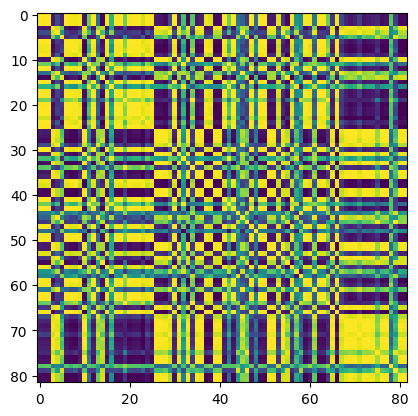

In [56]:
plt.imshow(dfc[2,400,:,:])